# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [36]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("/content/drive/MyDrive/Colab Notebooks/Neuro_Analysis/neural-data/01-local_field_potential/code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1)

In [2]:
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [4]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)
lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


In [35]:
from scipy.signal import butter
from scipy.signal import sosfilt

#2)

Text(0.5, 0, 'time (s)')

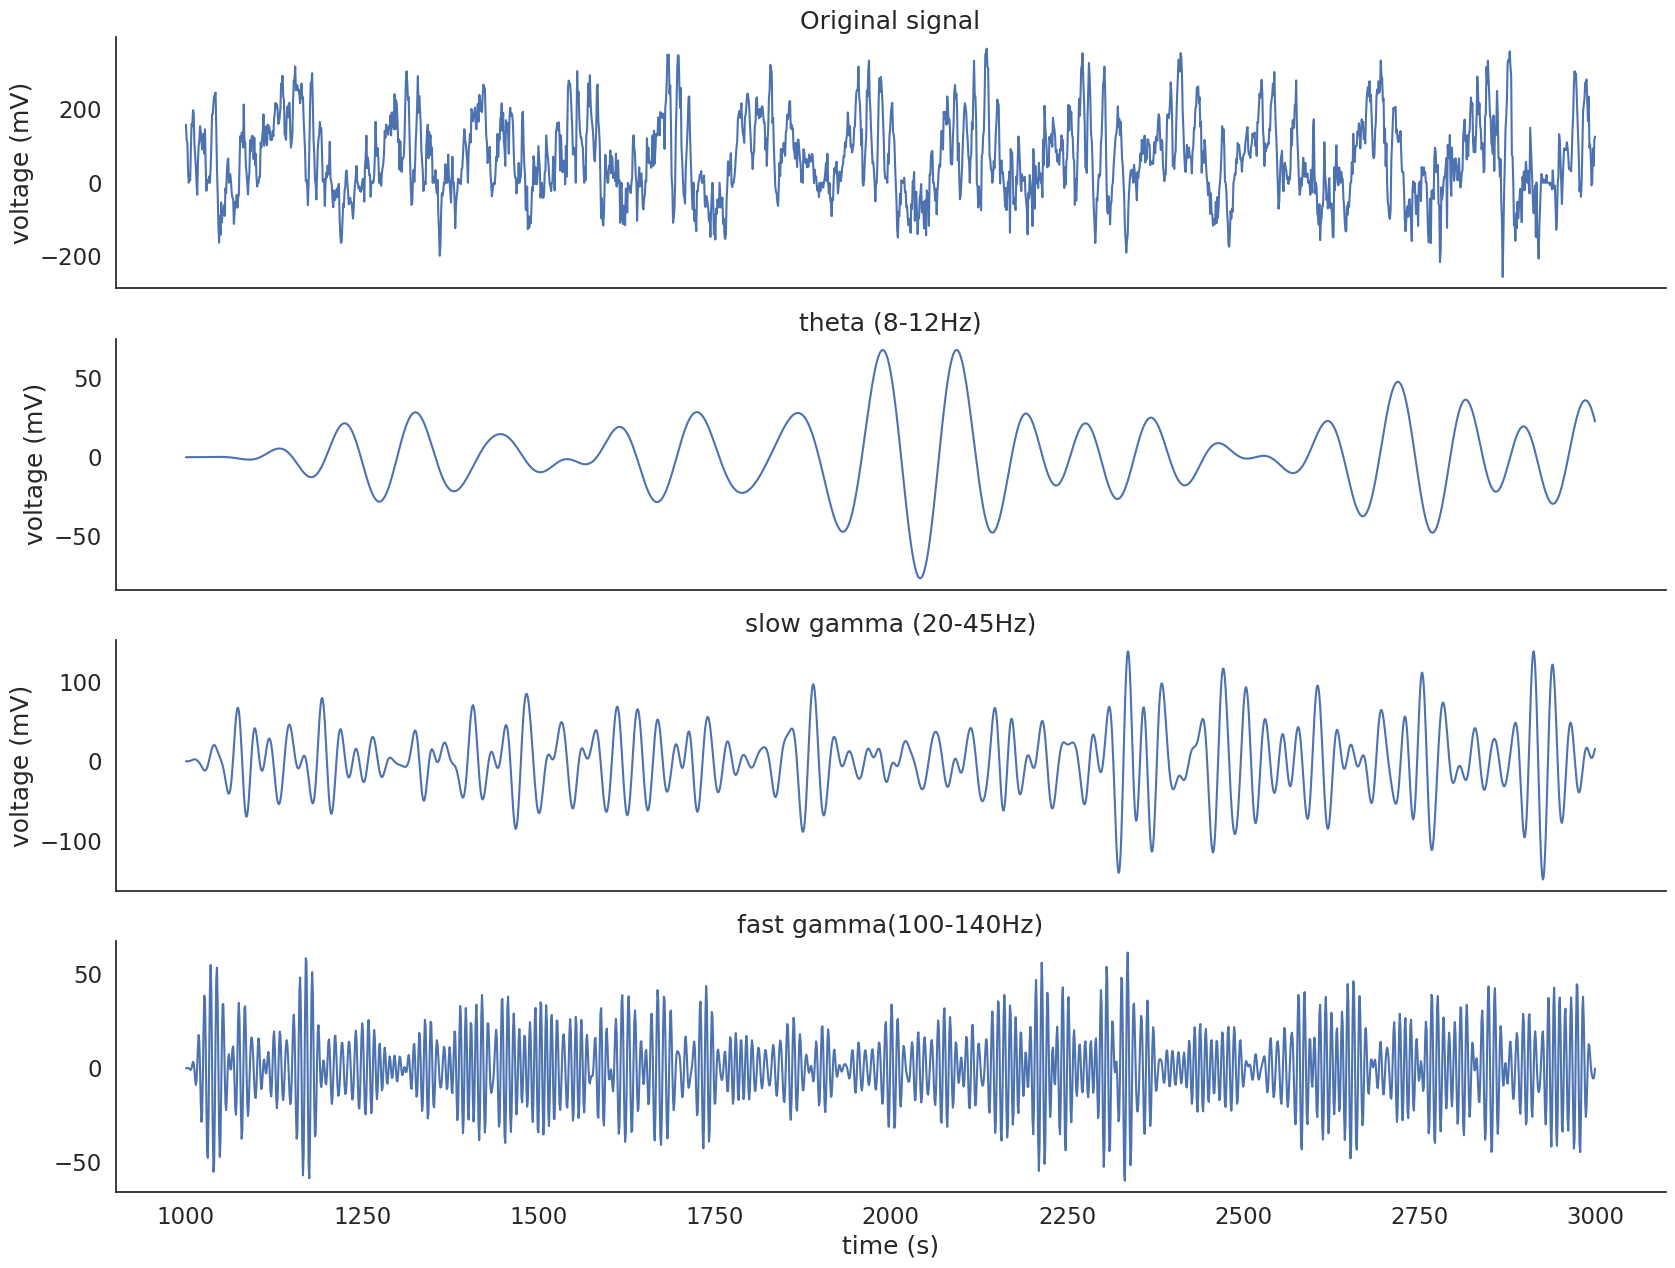

In [6]:
data_2s = lfp[1000:3000]
#define filter object
filter_order = 5 #the higher the order, the sharper the filter frequency response,
                 #but with more computations and potental numerical instability
low_f1 = 8
high_f1 = 12
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band',
                output='sos',
                fs=sampling_rate)

low_f2 = 20
high_f2 = 45
filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band',
                output='sos',
                fs=sampling_rate)

low_f3 = 100
high_f3 = 140
filter3 = butter(filter_order,[low_f3,high_f3],
                btype='band',
                output='sos',
                fs=sampling_rate)
#apply filter to lfp
theta_band = sosfilt(filter1, data_2s)
slow_gamma_band = sosfilt(filter2, data_2s)
fast_gamma_band = sosfilt(filter3, data_2s)
fig, ax = plt.subplots(4, figsize=(20,15), sharex=True)
ax[0].plot(np.arange(1000,3000),data_2s)
ax[0].set_title("Original signal")
ax[1].plot(np.arange(1000,3000),theta_band)
ax[1].set_title("theta (8-12Hz)")
ax[2].plot(np.arange(1000,3000),slow_gamma_band)
ax[2].set_title("slow gamma (20-45Hz)")
ax[3].plot(np.arange(1000, 3000), fast_gamma_band)
ax[3].set_title("fast gamma(100-140Hz)")
for i in range(3):
  ax[i].set_ylabel('voltage (mV)')
ax[-1].set_xlabel('time (s)')

#3)

65.2 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
80.5 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


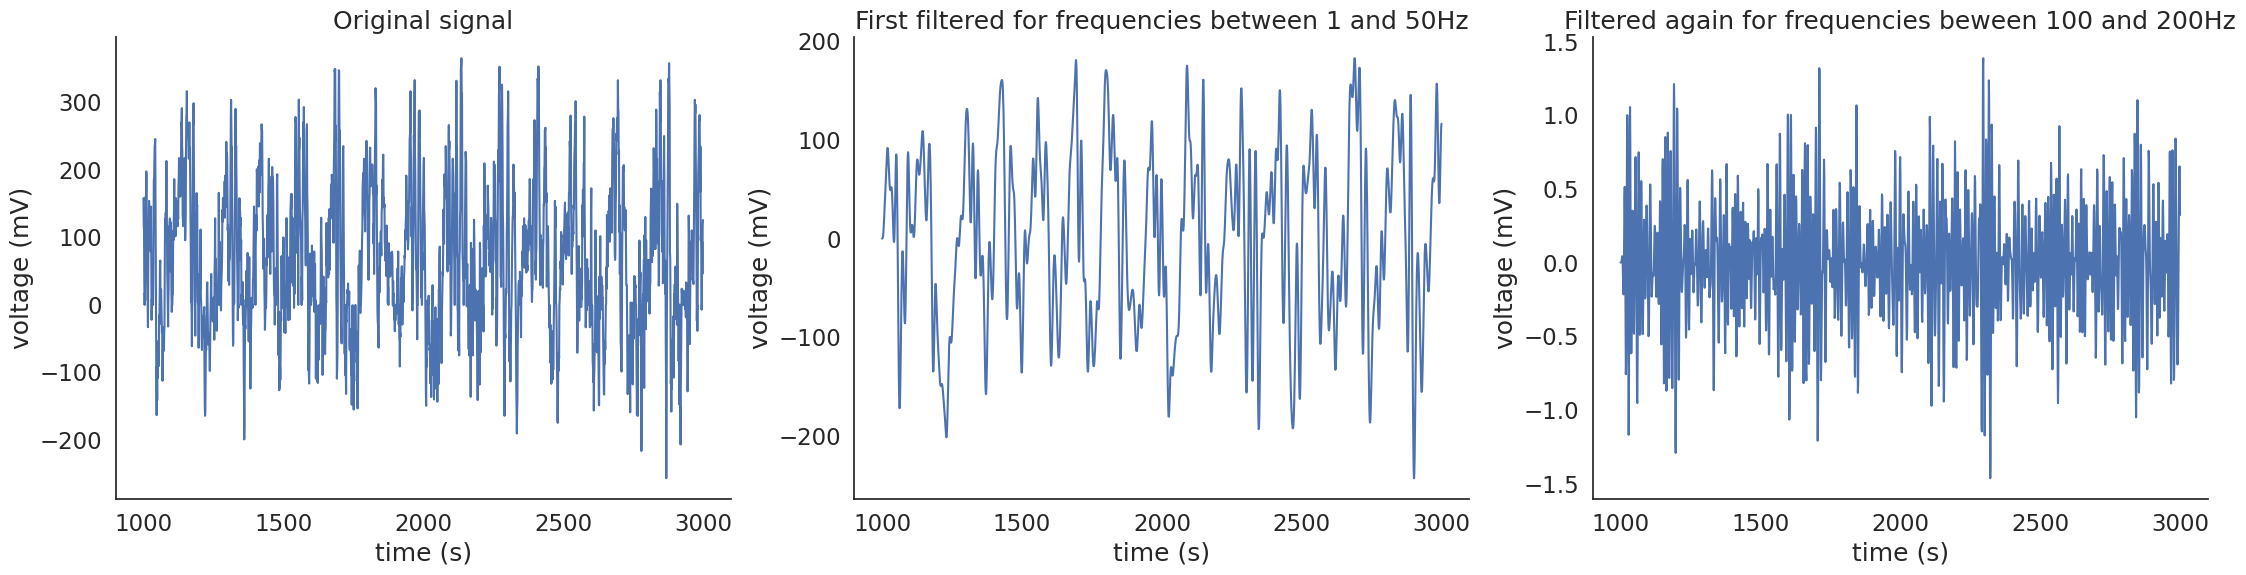

In [ ]:

data_2s = lfp[1000:3000]
#define filter object
filter_order = 5 #the higher the order, the sharper the filter frequency response,
                 #but with more computations and potental numerical instability
low_f1 = 1
high_f1 = 50
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band',
                output='sos',
                fs=sampling_rate)

low_f2 = 100
high_f2 = 200
filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band',
                output='sos',
                fs=sampling_rate)
#apply filter to lfp
"""
%timeit lowf_data_2s = sosfilt(filter1, data_2s)
%timeit midf_data_2s = sosfilt(filter2, lowf_data_2s)
"""
lowf_data_2s = sosfilt(filter1, data_2s)
midf_data_2s = sosfilt(filter2, lowf_data_2s)
fig, ax = plt.subplots(1,3, figsize=(27,6))
ax[0].plot(np.arange(1000,3000),data_2s)
ax[0].set_title("Original signal")
ax[1].plot(np.arange(1000,3000),lowf_data_2s)
ax[1].set_title("First filtered for frequencies between 1 and 50Hz")
ax[2].plot(np.arange(1000,3000),midf_data_2s)
ax[2].set_title("Filtered again for frequencies beween 100 and 200Hz")
for i in range(3):
  ax[i].set_xlabel('time (s)')
  ax[i].set_ylabel('voltage (mV)')

84.1 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
66.4 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


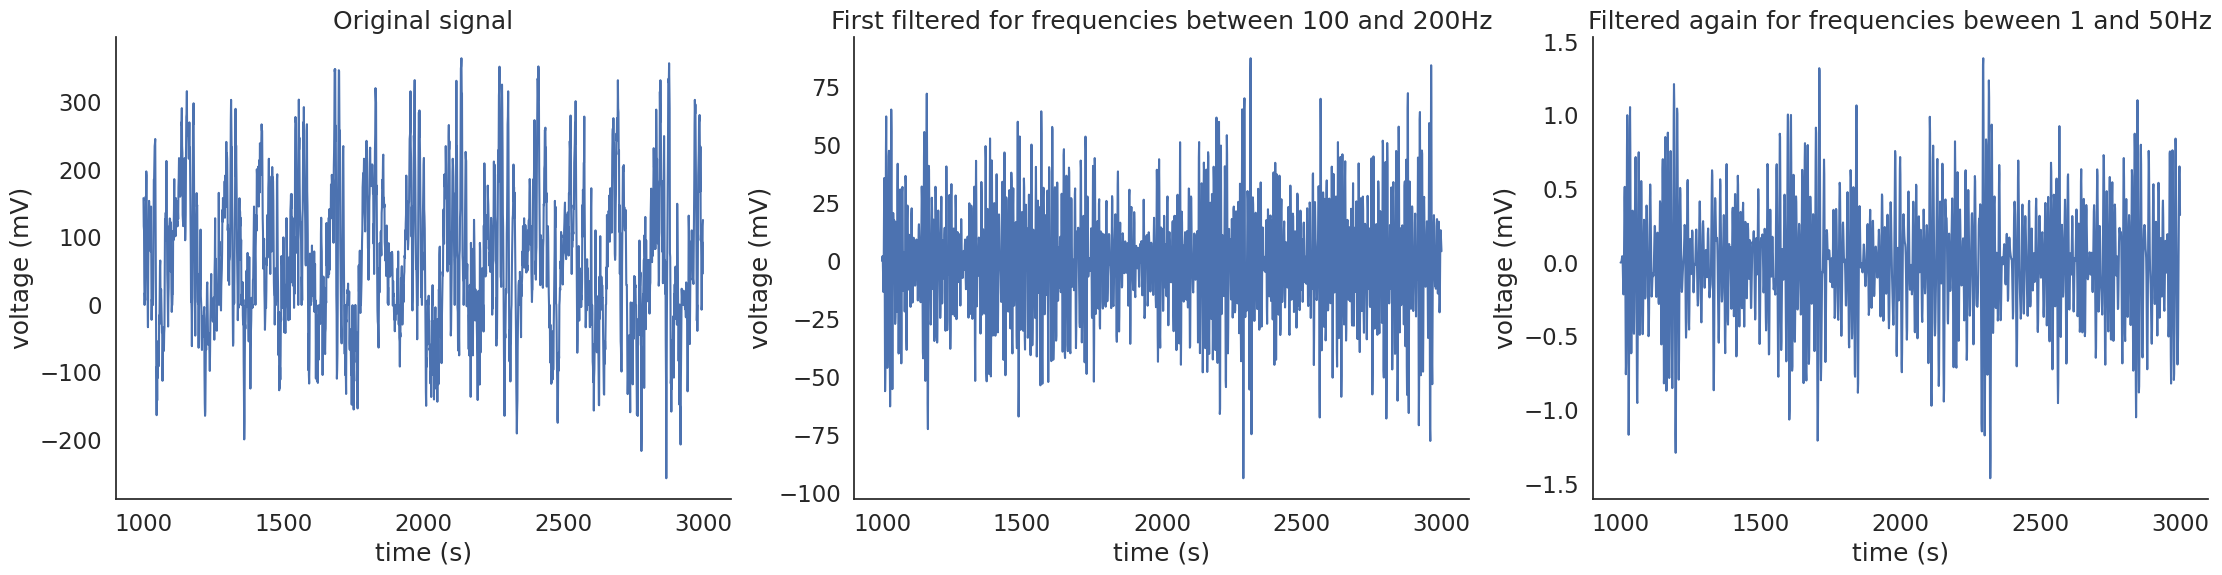

In [ ]:
data_2s = lfp[1000:3000]
#define filter object
filter_order = 5 #the higher the order, the sharper the filter frequency response,
                 #but with more computations and potental numerical instability
low_f1 = 1
high_f1 = 50
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band',
                output='sos',
                fs=sampling_rate)

low_f2 = 100
high_f2 = 200
filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band',
                output='sos',
                fs=sampling_rate)
#apply filter to lfp
"""
%timeit midf_data_2s = sosfilt(filter2, data_2s)
%timeit lowf_data_2s = sosfilt(filter1, midf_data_2s )
"""
midf_data_2s = sosfilt(filter2, data_2s)
lowf_data_2s = sosfilt(filter1, midf_data_2s )
fig, ax = plt.subplots(1,3, figsize=(27,6))
ax[0].plot(np.arange(1000,3000),data_2s)
ax[0].set_title("Original signal")
ax[1].plot(np.arange(1000,3000),midf_data_2s)
ax[1].set_title("First filtered for frequencies between 100 and 200Hz")
ax[2].plot(np.arange(1000,3000),lowf_data_2s)
ax[2].set_title("Filtered again for frequencies beween 1 and 50Hz")
for i in range(3):
  ax[i].set_xlabel('time (s)')
  ax[i].set_ylabel('voltage (mV)')

The data after filtering is what one would expect. When there is no overlap in frequency the frequency band filtered later is only quite weak in amplitude. It becomes weaker as futher the frequency bands are apart from each other. The computational time of the filter seems not to depend on the width of the frequency band (see next plot).

94.4 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.6 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.6 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72.6 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
68.6 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.2 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84.5 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
64.2 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84.7 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.5 µs ± 993 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70.7 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.4 µs ± 658 ns per loop (mean ± std. dev. 

Text(0, 0.5, 'time')

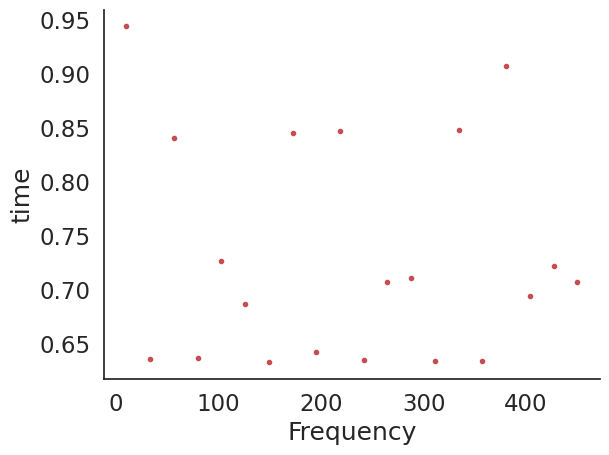

In [ ]:
data_2s = lfp[1000:3000]
#define filter object
filter_order = 5 #the higher the order, the sharper the filter frequency response,
                 #but with more computations and potental numerical instability
N=20
timing_l = np.zeros(N)
frequencies = np.linspace(10,450,N)
for i in range(N):
  low_f = 1
  high_f = frequencies[i]
  filter = butter(filter_order,[low_f,high_f],
                  btype='band',
                  output='sos',
                  fs=sampling_rate)
  t = %timeit -o sosfilt(filter, data_2s)
  timing_l[i] = np.average(t.all_runs)

plt.plot(frequencies, timing_l, 'r.')
plt.xlabel("Frequency")
plt.ylabel("time")

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram.
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [34]:
from scipy import signal
from pywt import scale2frequency
from pywt import cwt
from scipy.fft import fft, fftfreq

#Fourier spectrum

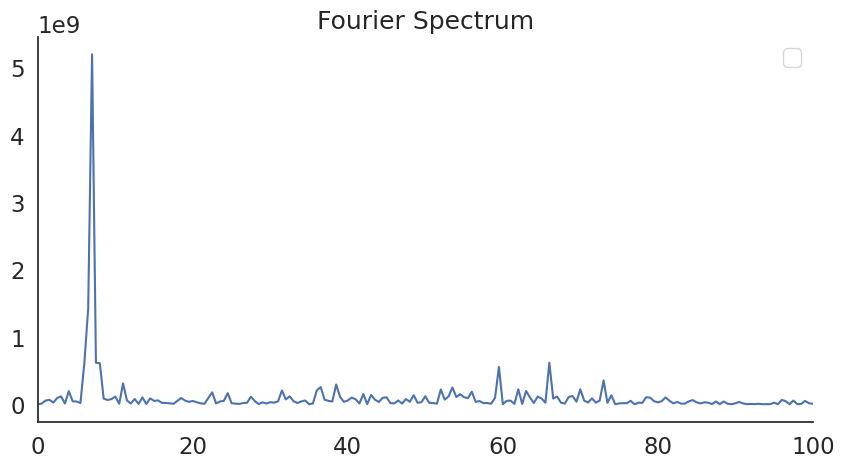

In [9]:
data_2s = lfp[1000:3000]
n_samples = len(data_2s)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_data = data_2s - np.mean(data_2s)

transformed_signal = fft(centered_data)

frequencies = fftfreq(n_samples,sample_dt)

transformed_signal = transformed_signal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

power = abs(transformed_signal)**2

plt.figure(figsize = (10,5))
plt.plot(frequencies,power)
plt.xlim([0,100]) # restrict to
plt.title("Fourier Spectrum")

plt.legend()

#Wavelet mexh

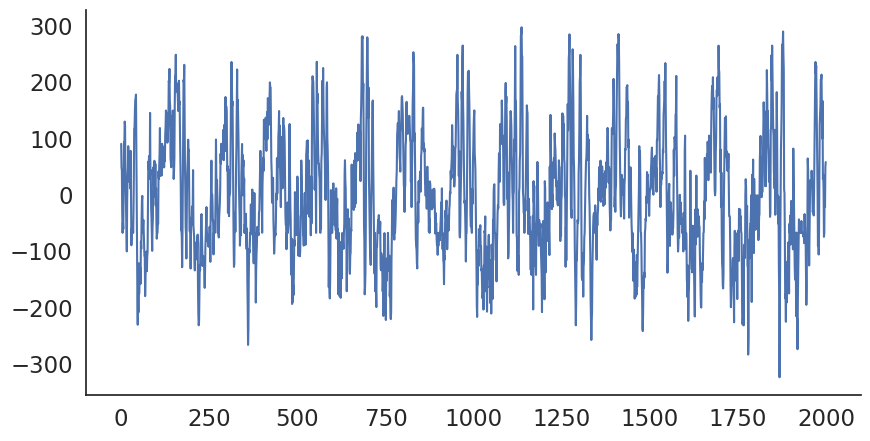

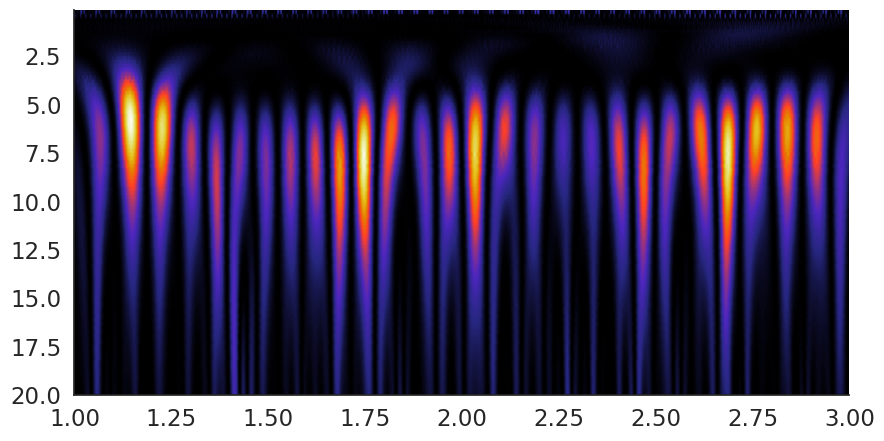

In [12]:
start = 1 #in seconds
end = 3 # in seconds

sig = data_2s.copy()
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


#Wavelet Gaussian

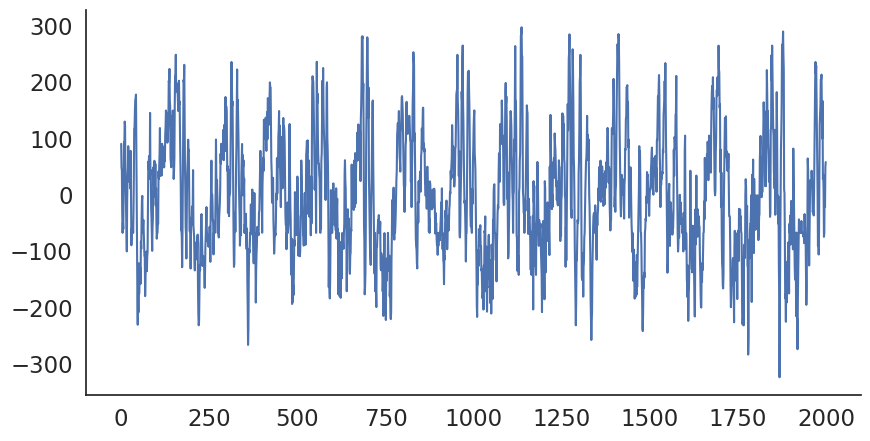

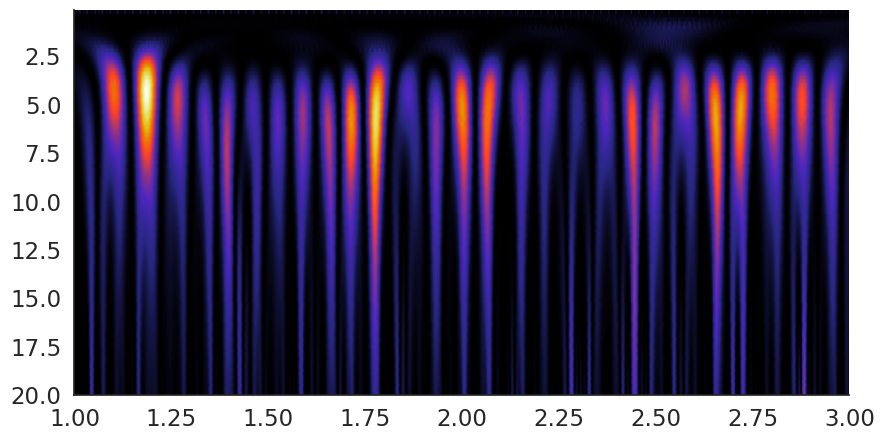

In [13]:
start = 1 #in seconds
end = 3 # in seconds

sig = data_2s.copy()
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#Wavelet morl

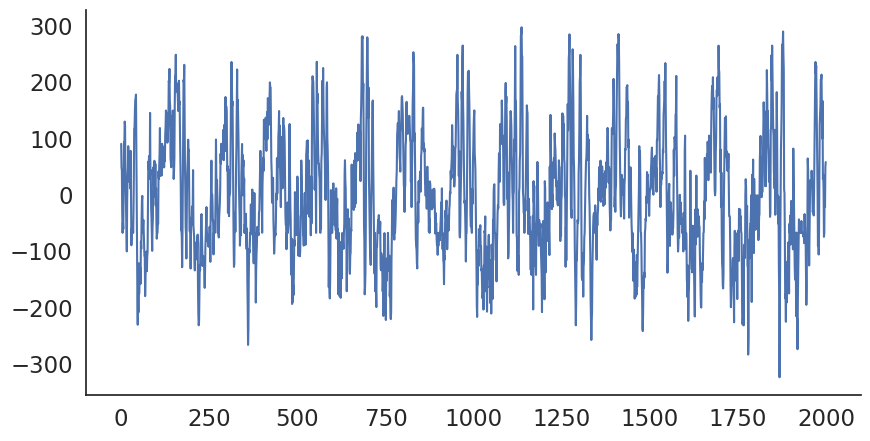

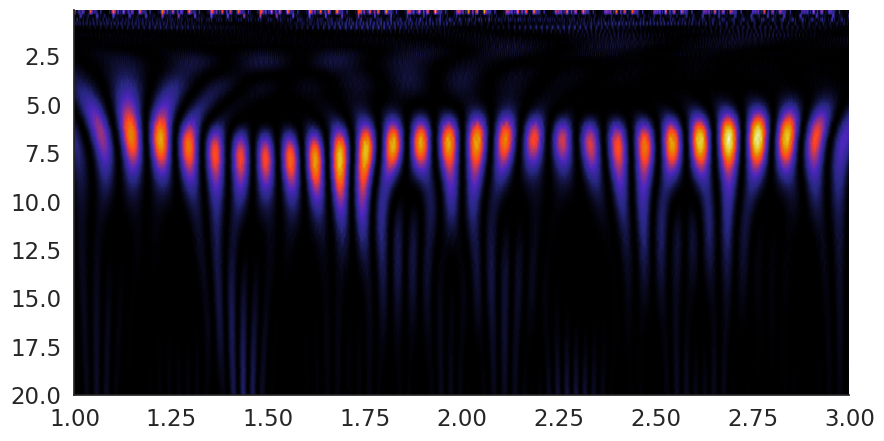

In [14]:
start = 1 #in seconds
end = 3 # in seconds

sig = data_2s.copy()
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

The Frequencies seem to be less spread out with the complex Morlet wavelet. It also seems overall 'sharper'. My guess would be, because with the complex transormation we can also capture information about the phase, not only the amplitude at a given time.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [3]:
import scipy

In [5]:
with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)
sleep_lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(sleep_lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 1816.576 seconds of LFP, sampled at 1000.0 Hz


#Instantanious Power delta and theta

Text(0, 0.5, 'power (a.u.)')

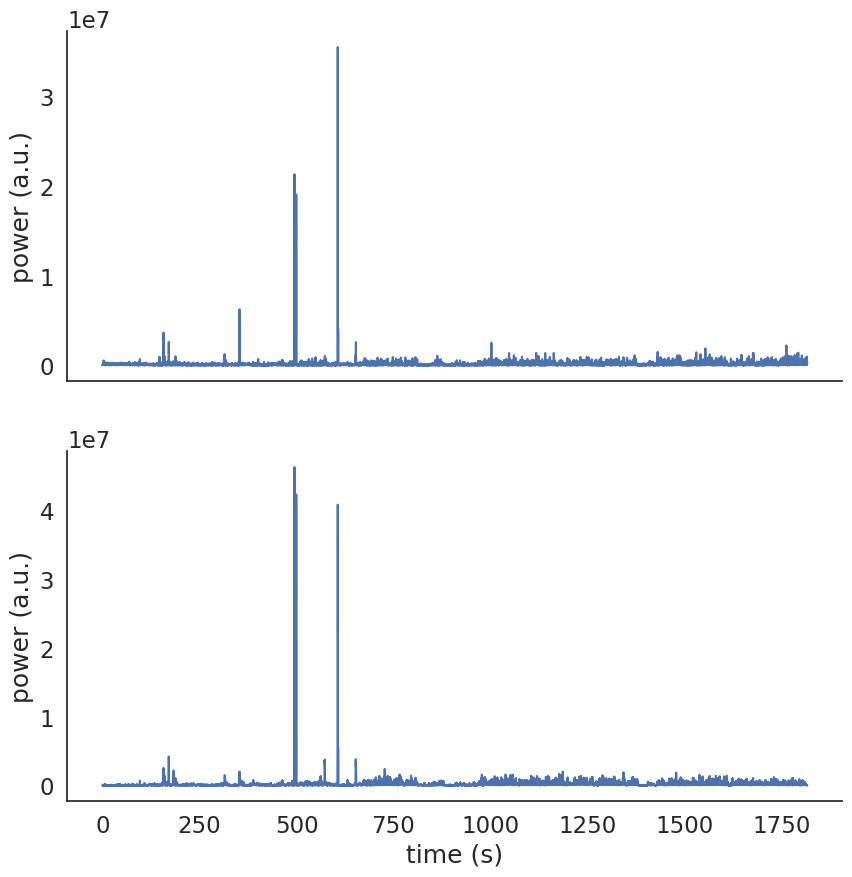

In [9]:
lfp_flat = sleep_lfp - np.mean(sleep_lfp)

frequencies_theta =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales_theta = scale2frequency(wavelet, frequencies_theta)
cwtmatr_theta, _ = cwt(lfp_flat, wavelet=wavelet, scales=scales_theta,
                  sampling_period=1.0/sampling_rate)

power_theta = np.mean(abs(cwtmatr_theta)**2,axis=0)

frequencies_delta =  np.linspace(2,4,50)/sampling_rate
scales_delta = scale2frequency(wavelet, frequencies_delta)
cwtmatr_delta, _ = cwt(lfp_flat, wavelet=wavelet, scales=scales_delta,
                  sampling_period=1.0/sampling_rate)

power_delta = np.mean(abs(cwtmatr_delta)**2,axis=0)

fig, ax = plt.subplots(2, figsize=(10,10), sharex=True)
ax[0].plot(np.linspace(0,len(sleep_lfp)/sampling_rate,len(power_theta)),power_theta)
ax[1].plot(np.linspace(0,len(sleep_lfp)/sampling_rate,len(power_delta)),power_delta)
ax[1].set_xlabel('time (s)')
ax[0].set_ylabel('power (a.u.)')
ax[1].set_ylabel('power (a.u.)')

##zscored:

Text(0, 0.5, 'power (a.u.) zscored')

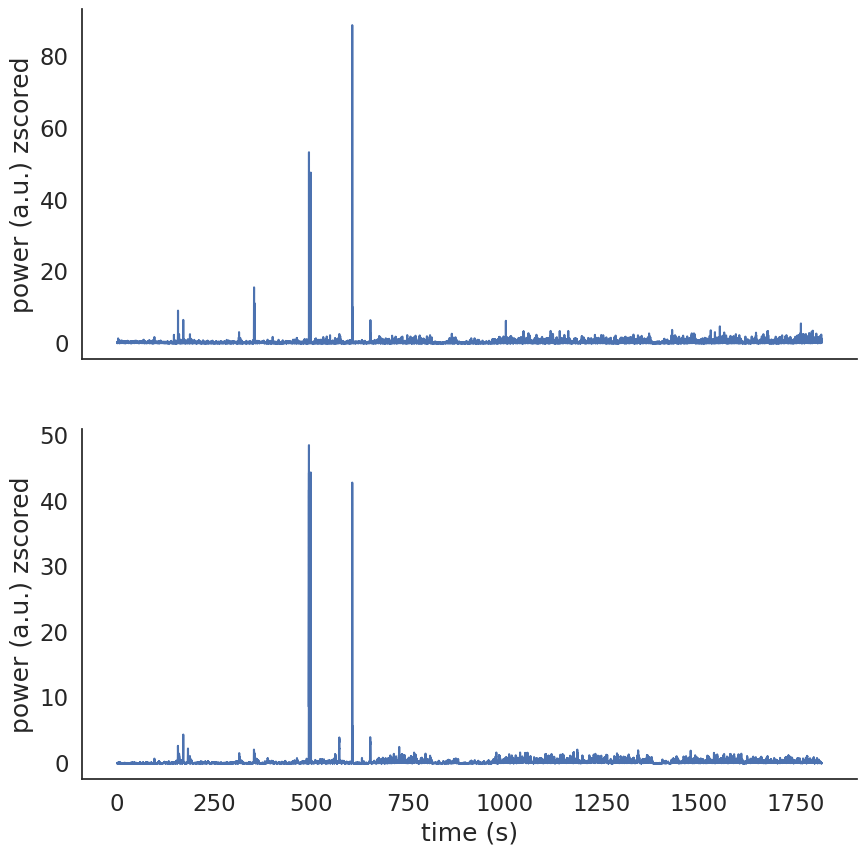

In [10]:
theta_power = scipy.stats.zscore(power_theta)
delta_power = scipy.stats.zscore(power_delta)
fig, ax = plt.subplots(2, figsize=(10,10), sharex=True)
ax[0].plot(np.linspace(0,len(sleep_lfp)/sampling_rate,len(theta_power)),theta_power)
ax[1].plot(np.linspace(0,len(sleep_lfp)/sampling_rate,len(power_delta)),delta_power)
ax[1].set_xlabel('time (s)')
ax[0].set_ylabel('power (a.u.) zscored')
ax[1].set_ylabel('power (a.u.) zscored')

#Power Difference

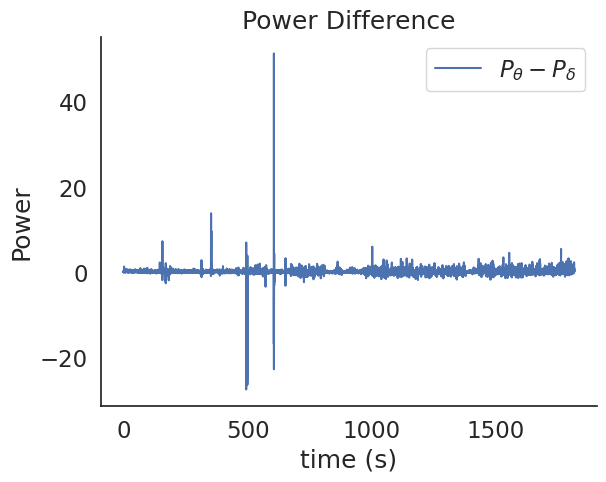

In [11]:
power_diff = theta_power - delta_power
plt.plot(np.linspace(0,len(sleep_lfp)/sampling_rate,len(power_delta)), power_diff, label ="$P_{\\theta}-P_{\delta}$")
plt.xlabel("time (s)")
plt.ylabel("Power")
plt.title("Power Difference")
plt.legend()

#REM and nREM sleep phases in the time interval of 30 to 60 min

([<matplotlib.axis.YTick at 0x79afec8d21a0>,
 [Text(0, 0, 'nREM'), Text(0, 1, 'REM')])

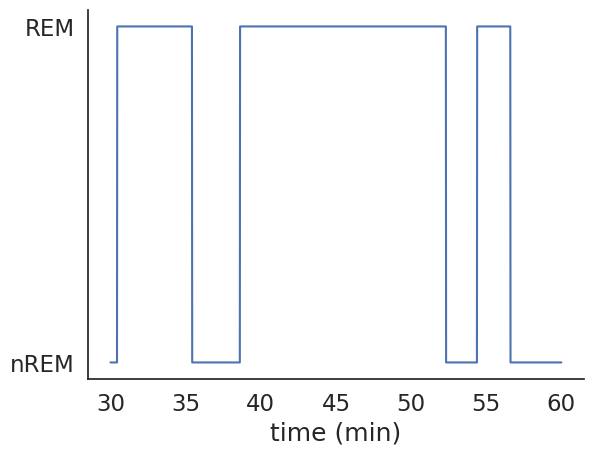

In [32]:
#search for REM-phase
start = 1800
end = 3600
start_min, end_min = start/60, end/60
REM_phase = (np.abs(power_diff)>0.2).astype(int)
plt.plot(np.linspace(start_min, end_min, len(REM_phase[start:end])),REM_phase[start:end])
plt.xlabel("time (min)")
plt.yticks([0,1], ["nREM", "REM"])

#Example plot of power in nREM and REM sleep phases broadband filtered.

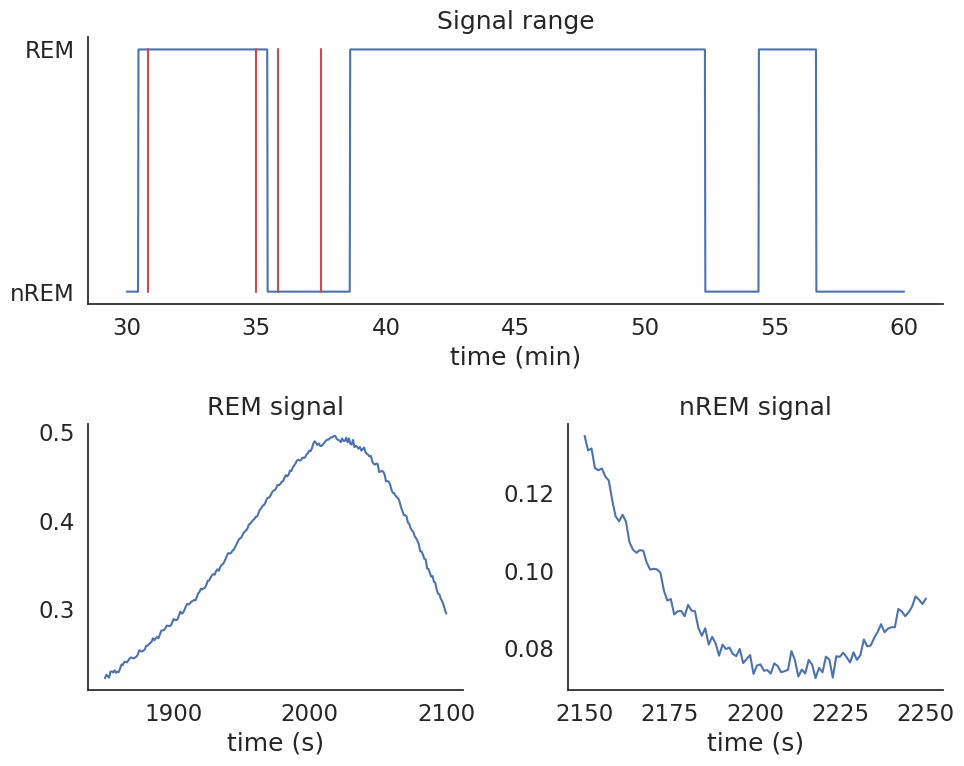

In [65]:
start_REM = 1850
end_REM = 2100
start_nREM = 2150
end_nREM = 2250
REM_sig = power_diff[start_REM:end_REM]
nREM_sig = power_diff[start_nREM:end_nREM]
low_f = 0.0001
high_f = 200

filter_order = 5
filter = butter(filter_order,[low_f,high_f],
                btype='band',
                output='sos',
                fs=sampling_rate)
REM_sig_filt = sosfilt(filter, REM_sig)
nREM_sig_filt = sosfilt(filter, nREM_sig)

fig = plt.figure(figsize=(10,8))

gs = gridspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.plot(np.linspace(start_min, end_min, len(REM_phase[start:end])), REM_phase[start:end])
ax1.plot([start_REM/60,start_REM/60], [0,1], 'r')
ax1.plot([end_REM/60,end_REM/60], [0,1], 'r')
ax1.plot([start_nREM/60,start_nREM/60], [0,1], 'r')
ax1.plot([end_nREM/60,end_nREM/60], [0,1], 'r')
ax1.set_xlabel("time (min)")
ax1.set_title('Signal range')
ax1.set_yticks([0,1], ["nREM", "REM"])


ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(np.linspace(start_REM, end_REM, len(REM_sig_filt)), REM_sig)
ax2.set_title('REM signal')
ax2.set_xlabel("time (s)")


ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column
ax3.plot(np.linspace(start_nREM, end_nREM, len(nREM_sig_filt)), nREM_sig)
ax3.set_xlabel("time (s)")
ax3.set_title('nREM signal')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Note that I plotted above the unfiltered signal. I have some problems with the filterd signal. I'm not sure why, but they are changed quite a bit while this should not be the case I think. I plotted them below. My best guess is that it filtered 'signals' lower 1Hz and that this causes the decay. It gets better as lower I put the frequency, but at a certain point I get an error that the frequency cant be 0.

Text(0.5, 1.0, 'nREM signal')

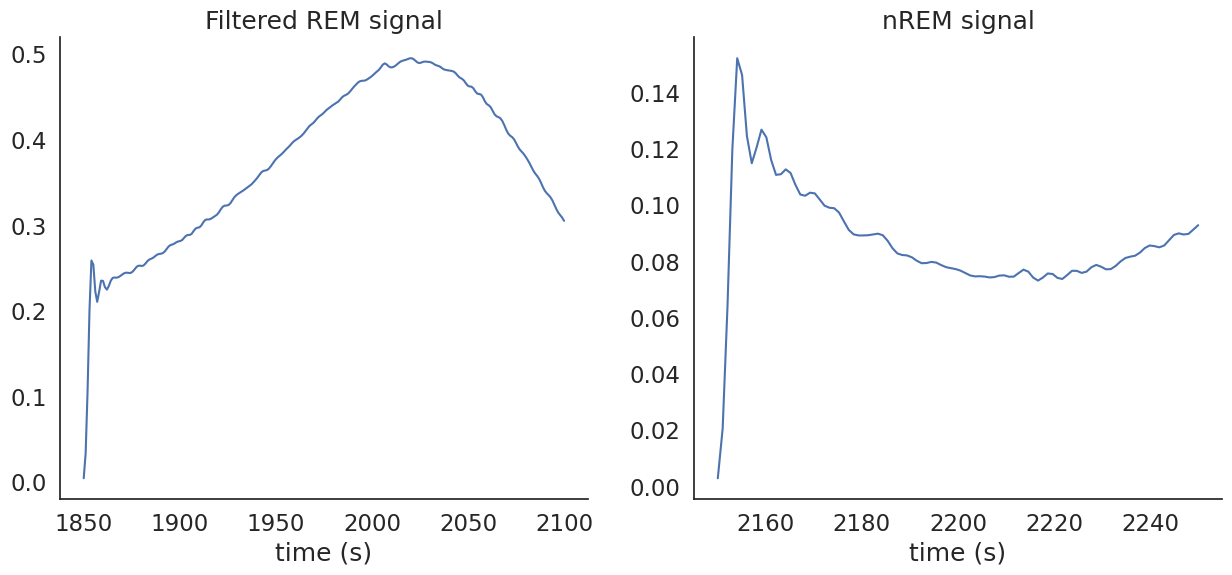

In [66]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(np.linspace(start_REM, end_REM, len(REM_sig_filt)), REM_sig_filt)
ax[0].set_title('Filtered REM signal')
ax[0].set_xlabel("time (s)")
ax[1].plot(np.linspace(start_nREM, end_nREM, len(nREM_sig_filt)), nREM_sig_filt)
ax[1].set_xlabel("time (s)")
ax[1].set_title('nREM signal')

#Changing the treshold

Text(0.5, 0, 'Treshold')

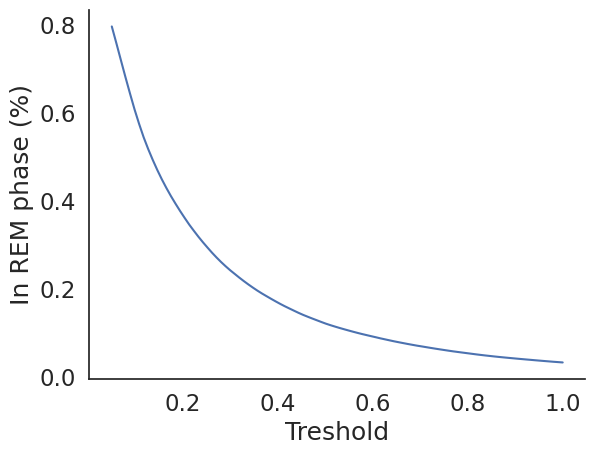

In [71]:
treshold_list = np.linspace(0.05, 1, 100)
perc_REM = np.zeros(len(treshold_list))
for i in range(len(treshold_list)):
  REM_phase = (np.abs(power_diff)>treshold_list[i]).astype(int)
  perc = np.sum(REM_phase)/len(REM_phase)
  perc_REM[i]=perc
plt.plot(treshold_list, perc_REM)
plt.ylabel("In REM phase (%)" )
plt.xlabel("Treshold")